# Capstone 2: Modeling<a id='Modeling'></a>

## Contents<a id='Contents'></a>
* [Modeling](#Modeling)
  * [Contents](#Contents)
  * [Introduction](#Introduction)
  * [Imports](#Imports)
  * [Load the Data](#Load_the_Data)
  * [Explore the Data](#Explore_the_Data)
    * [Visualize Correlations](#Visualize_Correlations)
    * [Correlation Matrix Heatmaps](#Correlation_Matrix_Heatmaps)
  * [Training and Test Sets](#Training_and_Test_Sets)
  * [Scale the Data](#Scale_the_Data)
  * [Models](#Models)
    * [Linear Regression Models](#Linear_Regression_Models)
    * [Random Forest Models](#Random_Forest_Models)
    * [Random Forest Hyperparameter Tuning](#Random_Forest_Hyperparameter_Tuning)
    * [Elastic Net Models](#Elastic_Net_Models)
  * [Predictions](#Predictions)
  * [Summary](#Summary)

## Introduction<a id='Introduction'></a>

Now that the data is prepared for machine learning algorithms, I'll look at two methods, linear regression and random forest regressor. I'll be judging the best algorithms based on typical evaluation metrics and scatter plots of the predicted and actual datasets versus date. After having done some prelimiary analysis, using previous datasets, I found that the structure of the datasets would not permit accurate prediction of weekly sales. Therefore, I created a new dataset, based on keeping the markdown columns, although with missing values transformed to 0, and combining the weekly sales of every department for each store each day into one weekly sales value per store per date. This data was much cleaner and produced more reliable results as shown below.

## Imports<a id='Imports'></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm #This is a python module which provides classes and functions for the estimation of different statistical models, conducting statistical tests, and statistical EDA.
from statsmodels.graphics.api import abline_plot # For visualizing evaluating predictions.
from sklearn.metrics import mean_squared_error, r2_score #The mean_squared error is the average squared difference between the estimated values and true value. The r2_score is used to determine how the variability of one factor can be caused by its relationship to another related factor.
from sklearn.model_selection import train_test_split # To split the data.
from sklearn import linear_model, preprocessing # The linear model is the ordinary least squares linear regression model. Preprocessing helps to standardize a data set. If some outliers are present in the set, robust scalers or transformers are more appropriate.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')
import os
from library.sb_utils import save_file
import datetime as dt

#Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

#Random Forest Regression Model
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_regression

#ElasticNet Regression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

C:\Users\jmhat\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\jmhat\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Load the Data<a id='Load_the_Data'></a>

After the less than optimal results from the original datasets, I'll use the original dataset with the markdown columns included since it will probably be beneficial to have the most data possible. I'll then change this dataset later below for better analysis.

In [2]:
retail_data = pd.read_csv('C:/Users/jmhat/Desktop/Coding/Capstone2/data/retail_data.csv')

In [3]:
retail_data_nosales = pd.read_csv('C:/Users/jmhat/Desktop/Coding/Capstone2/data/retail_data_nosales.csv')

## Explore the Data<a id='Explore_the_Data'></a>

### Visualize Correlations<a id='Visualize_Correlations'></a>

Below I'll look at the histograms of the new dataframe I've created by combining the weekly sales values of each department for each store and date combination.

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Fuel_Price'}>],
       [<AxesSubplot:title={'center':'MarkDown1'}>,
        <AxesSubplot:title={'center':'MarkDown2'}>,
        <AxesSubplot:title={'center':'MarkDown3'}>,
        <AxesSubplot:title={'center':'MarkDown4'}>],
       [<AxesSubplot:title={'center':'MarkDown5'}>,
        <AxesSubplot:title={'center':'CPI'}>,
        <AxesSubplot:title={'center':'Unemployment'}>,
        <AxesSubplot:title={'center':'IsHoliday'}>],
       [<AxesSubplot:title={'center':'Weekly_Sales'}>,
        <AxesSubplot:title={'center':'Size'}>,
        <AxesSubplot:title={'center':'Type_B'}>,
        <AxesSubplot:title={'center':'Type_C'}>]], dtype=object)

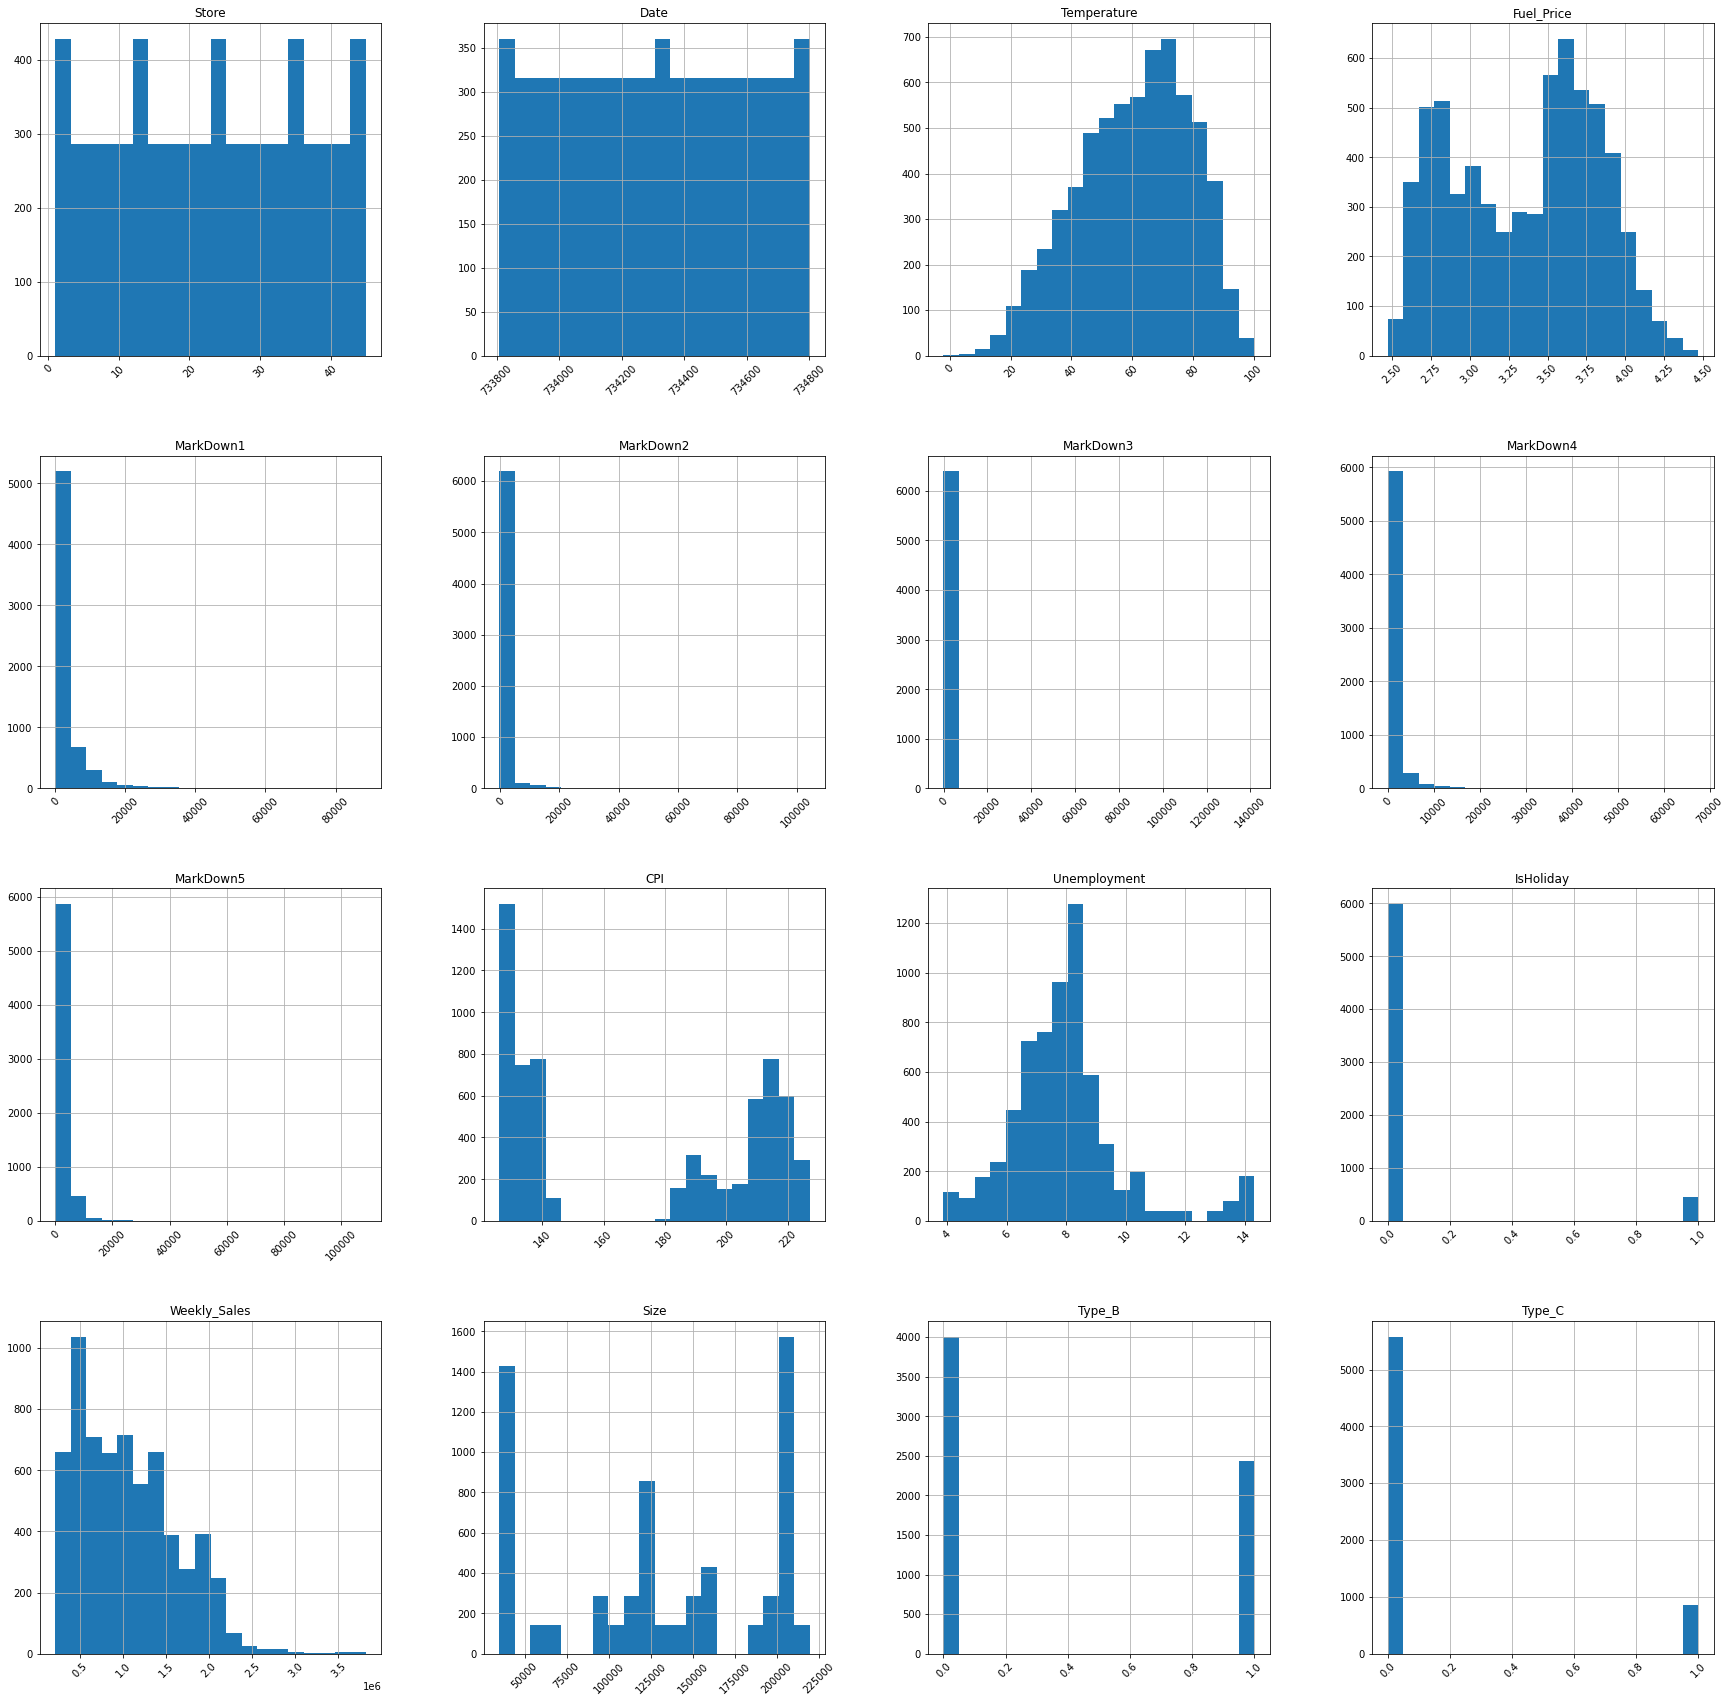

In [4]:
retail_data.hist(bins=20, figsize=(30,30), xrot=45)

I used the histograms to see if there were any interesting trends in the dataframe values. Temperature and unemployment seem to have a normal distribution while fuel price and CPI have a more bimodal type of distribution. Size does not appear to have any particular trends and every markdown and the weekly sales are right-skewed.

###  Plot the Correlation Matrix Heatmaps<a id='Correlation_Matrix_Heatmaps'></a>

I've removed all the categorical variables for the correlation matrix heatmap below

In [5]:
retail_data_cont = retail_data.drop(columns=['Store', 'Date', 'IsHoliday', 'Type_B', 'Type_C'])

Correlation between continuous features


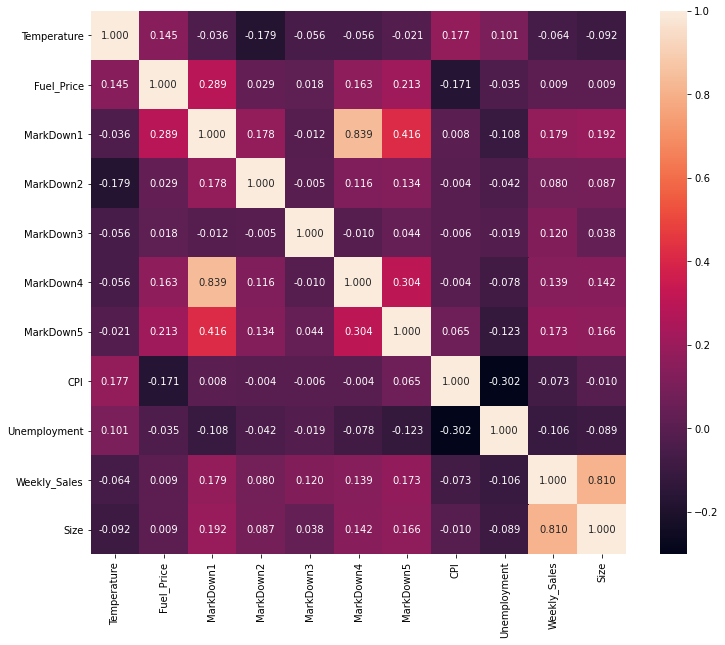

In [6]:
plt.figure(figsize=(12,10))
print('Correlation between continuous features')
p=sns.heatmap(retail_data_cont.corr(), annot=True, fmt='.3f')

There seems to be a few interesting correlations occuring as shown on the heat maps. We are interested in correlations with weekly sales, which shows a positive correlation with the size of the store, the markdown columns, and fuel price. All the other features showed negative correlations with weekly sales. Size had the highest positive correlation of 0.810 with the other positive correlation being relatively low, below 0.2. Interestingly, the markdown features had high positive correlations with each other and a few higher positive correlations with fuel price. Unemployment, while having a low correlation, did seem to indiacte that as unemployment falls, sales would rise, which would make sense. The rest of the correlations were either positive or negative but very low.

## Split data into training and test sets<a id='Training_and_Test_Sets'></a>

I'll use the train test split function to split the data for the machine learning modesl. I've used a split of 80/20 training to test samples and a random state of 42 for reproducibility.

In [7]:
#Split the data into training and testing sections
X = retail_data.drop(columns=['Weekly_Sales'])
y = retail_data['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale the training and testing data<a id='Scale_the_Data'></a>

There are a few common scalers, but I've decided to use the standard scaler and min max scaler methods for the data. I will also export the unscaled data to see how that fits with the models. If I were to go on to create a neural network I would also need to make sure I didn't have any negative values.

In [8]:
SS_scaler = StandardScaler()
MM_scaler = MinMaxScaler()

XtrainSS = SS_scaler.fit_transform(X_train)
XtrainMM = MM_scaler.fit_transform(X_train)

XSS_train = pd.DataFrame(XtrainSS, columns=X.columns)
XMM_train = pd.DataFrame(XtrainMM, columns=X.columns)

In [9]:
XtestSS = SS_scaler.fit_transform(X_test)
XtestMM = MM_scaler.fit_transform(X_test)

XSS_test = pd.DataFrame(XtestSS, columns=X.columns)
XMM_test = pd.DataFrame(XtestMM, columns=X.columns)

In [10]:
y_train = y_train.to_frame().reset_index(drop=True)
y_test = y_test.to_frame().reset_index(drop=True)

In [11]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

## Models<a id='Models'></a>

For any regression model I test, I will use the r2_score metric as my determination for how well the model can predict test data and future predictions. This metric should be a good determination for model proficiency since there are many samples for both training and testing the machine learning models.

### Linear Regression Models<a id='Linear_Regression_Models'></a>

I've created multiple linear regression models based on the scaled and unscaled datasets.

In [12]:
#Linear Regression Model using the Standard Scaler data
regSS = LinearRegression()
regSS.fit(XSS_train, y_train)
ySS_pred = regSS.predict(XSS_test)
ySSt_pred = regSS.predict(XSS_train)

print("R^2 Test Data: {}".format(r2_score(y_test, ySS_pred)))
rmse = np.sqrt(mean_squared_error(y_test, ySS_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2 Test Data: 0.7182365321235165
Root Mean Squared Error: 301282.90247446735


In [13]:
#Linear Regression Model using the Min/Max Scaler data
regMM = LinearRegression()
regMM.fit(XMM_train, y_train)
yMM_pred = regMM.predict(XMM_test)

print("R^2: {}".format(r2_score(y_test, yMM_pred)))
rmse = np.sqrt(mean_squared_error(y_test, yMM_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7181207161165813
Root Mean Squared Error: 301344.815748888


In [14]:
#Linear regression models with no scaling
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
ytrain_pred = reg.predict(X_train)

print("R^2 Test Data: {}".format(r2_score(y_test, y_pred)))
print("R^2 Train Data: {}".format(r2_score(y_train, ytrain_pred)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2 Test Data: 0.7183964246205543
R^2 Train Data: 0.7231906911560239
Root Mean Squared Error: 301197.40574192867


The best linear regression model was created with the unscaled data, so I will create a scatter plot of the predicted versus actual values over time with this model to see how well the data matches up.

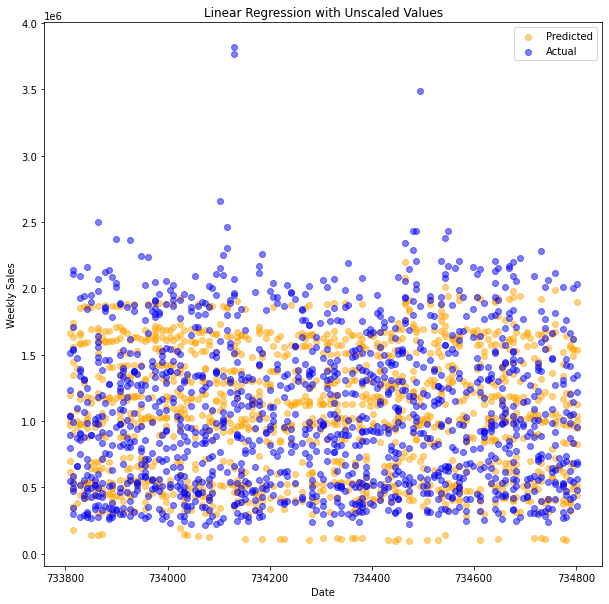

In [15]:
#Scatter plot of Linear Regression with Unscaled Values
plt.figure(figsize=(10,10))
plt.title('Linear Regression with Unscaled Values')
pred = plt.scatter(X_test['Date'], y_pred, color ="orange", alpha=0.5)
act = plt.scatter(X_test['Date'], y_test, color='blue', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend((pred, act),
           ('Predicted', 'Actual'),
           scatterpoints=1,
           loc='upper right')
plt.show()

The predicted values seem to do okay with the middle data, but not with the high and low actual values. I'll look at using a random forest model to try and improve the predictive power.

I'll take a chance to also look at Lasso and Ridge regression using the unscaled data.

In [16]:
#Ridge Regression unscaled values
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.7073576436503218

In [17]:
#Ridge Regression Standard Scaled values
ridgeSS = Ridge(alpha=0.1, normalize=True)
ridgeSS.fit(XSS_train, y_train)
ridgeSS_pred = ridgeSS.predict(XSS_test)
ridgeSS.score(XSS_test, y_test)

0.7075572174404268

In [18]:
#Ridge Regression Min/Max values
ridgeMM = Ridge(alpha=0.1, normalize=True)
ridgeMM.fit(XMM_train, y_train)
ridgeMM_pred = ridgeSS.predict(XMM_test)
ridgeMM.score(XMM_test, y_test)

0.707951565714108

In [19]:
#Lasso Regression unscaled values
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.7183979031447565

In [20]:
#Lasso Regression Standard Scaled Values
lassoSS = Lasso(alpha=0.1, normalize=True)
lassoSS.fit(XSS_train, y_train)
lassoSS_pred = lassoSS.predict(XSS_test)
lassoSS.score(XSS_test, y_test)

0.7182382696395

In [21]:
#Lasso Regression Min/Max Values
lassoMM = Lasso(alpha=0.1, normalize=True)
lassoMM.fit(XMM_train, y_train)
lassoMM_pred = lassoMM.predict(XMM_test)
lassoMM.score(XMM_test, y_test)

0.7181240506305198

Lasso seems to have done the best with the regression, similar to the linear regression model. Next, I wanted to see if I could use lasso coefficients to determine which features were the most important for the regression.

In [22]:
lasso_pred = lasso_pred.reshape(1287,1)

<AxesSubplot:ylabel='Density'>

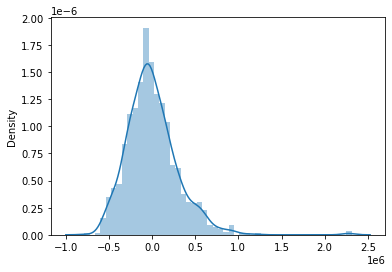

In [23]:
%matplotlib inline
sns.distplot(y_test-lasso_pred)

In [24]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
lasso_params = {
    'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1],
    'fit_intercept':[True, False],
    'normalize':[True, False],
    'positive':[True, False],
    'selection':['cyclic', 'random'],
    'max_iter':[100000],
}
lasso_best = Lasso()
search_lasso = GridSearchCV(lasso_best, lasso_params, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
lasso_results = search_lasso.fit(X, y)
print('Best Score: %s' % lasso_results.best_score_)
print('Best Hyperparameters: %s' % lasso_results.best_params_)

Best Score: -220594.87743011012
Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': True, 'max_iter': 100000, 'normalize': True, 'positive': False, 'selection': 'cyclic'}


In [25]:
lasso_updated = Lasso(alpha=0.1, fit_intercept = True, max_iter=100000, normalize=True, positive=False, selection='cyclic')
lasso_updated.fit(X_train, y_train)
lasso_best_pred = lasso_updated.predict(X_test)
print(r2_score(y_test, lasso_best_pred))

0.7183979031447565


This is the exact same r2 score as the normal lasso model with unscaled values.

In [26]:
#Cross validate the chosen model
#Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

#Print the 5-fold cross-validation scores
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.69856485 0.49089722 0.4465529  0.62378556 0.48693497]
Average 5-Fold CV Score: 0.5493471013795441


The 5 fold cross validation didn't seem to show any better regression values than the linear regression models. Next, I'll use the random forest regessor to look at the data.

### Random Forest Models<a id='Random_Forest_Models'></a>

I'll now use a random forest model with each of the differently scaled data, as well as the unscaled data.

In [78]:
#Random Forest with Standard Scaler
regressorSS = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressorSS.fit(XSS_train, y_train.values.ravel())
ySSf_pred = regressorSS.predict(XSS_test)

print('MAE: ', mean_absolute_error(y_test, ySSf_pred))
print('MSE: ', mean_squared_error(y_test, ySSf_pred))
print("R^2: {}".format(r2_score(y_test, ySSf_pred)))
rmseSS = np.sqrt(mean_squared_error(y_test, ySSf_pred))
print("Root Mean Squared Error: {}".format(rmseSS))

MAE:  88313.30064296813
MSE:  27289542868.49509
R^2: 0.9152905286332933
Root Mean Squared Error: 165195.46866816623


In [79]:
#Random Forest with Min Max Scaler
regressorMM = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressorMM.fit(XMM_train, y_train.values.ravel())
yMMf_pred = regressorMM.predict(XMM_test)

print('MAE: ', mean_absolute_error(y_test, yMMf_pred))
print('MSE: ', mean_squared_error(y_test, yMMf_pred))
print("R^2: {}".format(r2_score(y_test, yMMf_pred)))
rmseMM = np.sqrt(mean_squared_error(y_test, yMMf_pred))
print("Root Mean Squared Error: {}".format(rmseMM))

MAE:  72042.6320278943
MSE:  20101491943.569145
R^2: 0.9376029578645794
Root Mean Squared Error: 141779.73036922148


In [84]:
#Random Forest with no scalers
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(X_train, y_train.values.ravel())
yf_pred = regressor.predict(X_test)
yft_pred = regressor.predict(X_train)

print('MAE: ', mean_absolute_error(y_test, yf_pred))
print('MSE: ', mean_squared_error(y_test, yf_pred))
print("R^2 Test Data: {}".format(r2_score(y_test, yf_pred)))
print("R^2 Train Data: {}".format(r2_score(y_train, yft_pred)))
rmse_rf = np.sqrt(mean_squared_error(y_test, yf_pred))
print("Root Mean Squared Error: {}".format(rmse_rf))

MAE:  71261.82443100231
MSE:  18164726537.448456
R^2 Test Data: 0.9436148714574308
R^2 Train Data: 0.9933852764375707
Root Mean Squared Error: 134776.58007772884


So far, the best model with the random forest with the unscaled values. I'll create a scatter plot of the predicted versus actual values from this model over time to see how the data matches up. It does seem like the model may be overfitting the training data, but it is doint better than the linear regression and lasso models.

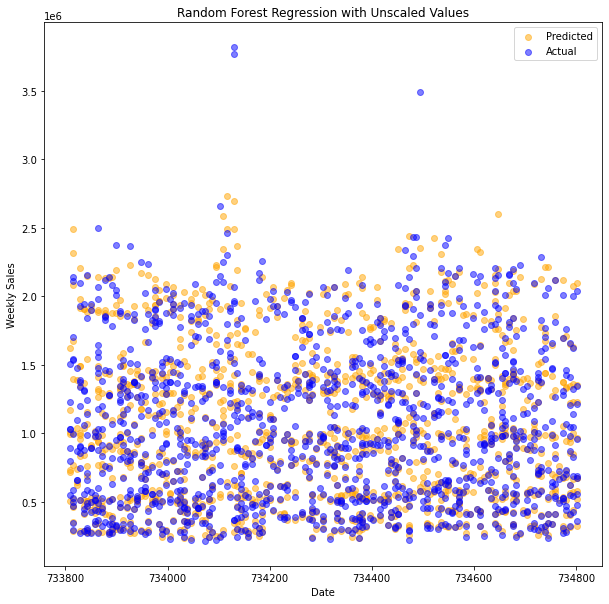

In [30]:
#Scatter plot of Random Forest Regression with Unscaled Values
plt.figure(figsize=(10,10))
plt.title('Random Forest Regression with Unscaled Values')
pred = plt.scatter(X_test['Date'], yf_pred, color ="orange", alpha=0.5)
act = plt.scatter(X_test['Date'], y_test, color='blue', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend((pred, act),
           ('Predicted', 'Actual'),
           scatterpoints=1,
           loc='upper right')
plt.show()

The predicted values seem to be much better using the random forest regression model with the unscaled values than with any of the linear regression models. Both the minimum and maximum values look well predicted. I'll go through some hyperparameter tuning now to see if this model is overfitting any of the data.

### Random Forest Hyperparameter Tuning<a id='Random_Forest_Hyperparameter_Tuning'></a>

In [31]:
#Test Hyperparamters of Random Forest Regression
n_estimators = [int(i) for i in np.linspace(start = 10, stop = 150, num = 15)]
max_depth = [None, 2, 3, 4, 5, 6]
min_samples_split = [2, 3, 4, 5, 6]
min_samples_leaf = [1, 2, 3, 4, 5]
max_features = ['auto', 'sqrt', 'log2']
random_state = [None, 42]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_features': max_features, 'random_state': random_state, 'bootstrap':bootstrap}

In [32]:
RF_Model = RandomForestRegressor()

In [33]:
RF_RandomGrid = RandomizedSearchCV(estimator = RF_Model, param_distributions = param_grid, cv = 10, verbose = 2, n_jobs = 4)
RF_RandomGrid.fit(X_train, y_train.values.ravel())

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 2, 3, 4, 5, 6],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150],
                                        'random_state': [None, 42]},
                   verbose=2)

In [34]:
RF_RandomGrid.best_params_

{'random_state': 42,
 'n_estimators': 30,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': True}

In [35]:
print(f'Train Accuracy: {RF_RandomGrid.score(X_train, y_train.values.ravel()):.3f}')
print(f'Test Accuracy: {RF_RandomGrid.score(X_test, y_test.values.ravel()):.3f}')

Train Accuracy: 0.857
Test Accuracy: 0.845


In [36]:
#Random Forest with no scalers and best parameters
regressor2 = RandomForestRegressor(n_estimators = 30, min_samples_split = 4, min_samples_leaf = 4, max_features = 'auto', max_depth = 4, bootstrap = True, random_state = 42)
regressor2.fit(X_train, y_train.values.ravel())
yf_pred2 = regressor2.predict(X_test)
yft_pred2 = regressor2.predict(X_train)

print('MAE: ', mean_absolute_error(y_test, yf_pred2))
print('MSE: ', mean_squared_error(y_test, yf_pred2))
print("R^2 Test Data: {}".format(r2_score(y_test, yf_pred2)))
print("R^2 Train Data: {}".format(r2_score(y_train, yft_pred2)))

MAE:  145851.00333051887
MSE:  50035606318.06203
R^2 Test Data: 0.8446844719554139
R^2 Train Data: 0.856721991863013


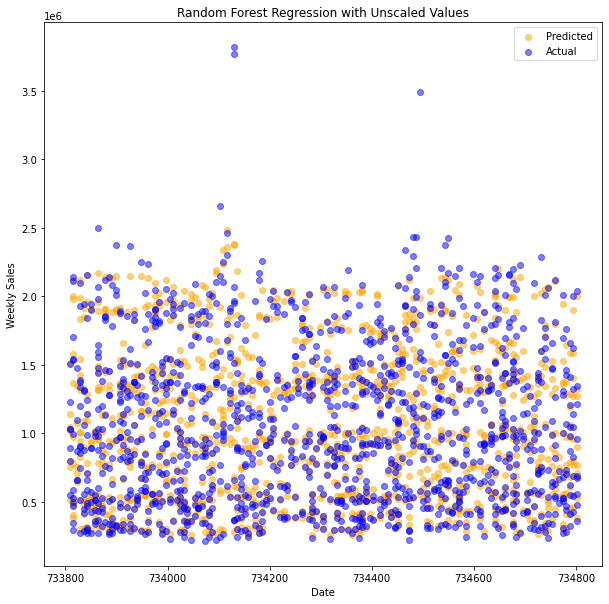

In [58]:
#Scatter plot of Random Forest Regression with Unscaled Values and Best Parameters
plt.figure(figsize=(10,10))
plt.title('Random Forest Regression with Unscaled Values')
pred = plt.scatter(X_test['Date'], yf_pred2, color ="orange", alpha=0.5)
act = plt.scatter(X_test['Date'], y_test, color='blue', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend((pred, act),
           ('Predicted', 'Actual'),
           scatterpoints=1,
           loc='upper right')
plt.show()

Visually, it's hard to tell the difference between the model with the best parameters and the previous random forest scatter plot. This makes sense as the hyperparameter tuning actually showed a worse fitting regression using the calculated best parameters than with the orginal model.

Below, I've looked at which features from the random forest regressor were the most important for the regression.

<AxesSubplot:title={'center':'Feature Importance of Updated Model'}, xlabel='Features'>

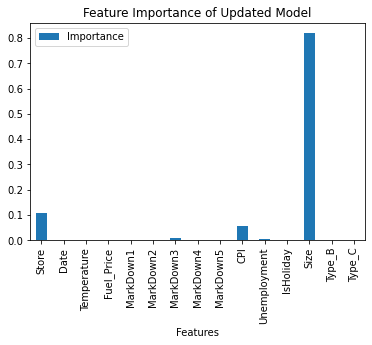

In [37]:
#Determine which features are the most important from the updated random forest regression model
FL = list(zip(X_train.columns, regressor2.feature_importances_))
df = pd.DataFrame(FL, columns=['Features', 'Importance'])
df.plot.bar(x='Features', y='Importance', rot=90, title='Feature Importance of Updated Model')

According to the best parameters regressor, the most important features in this regression are the store and size of store, and possibly CPI, unemployment, and the type of store.

<AxesSubplot:title={'center':'Feature Importance of Original Model'}, xlabel='Features'>

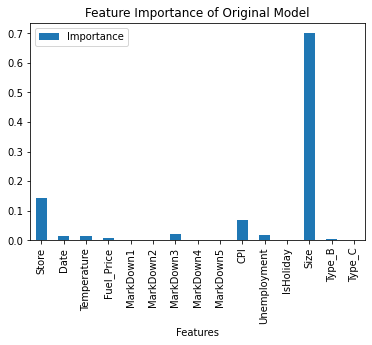

In [38]:
#Determine which features are the most important from the updated random forest regression model
FLO = list(zip(X_train.columns, regressor.feature_importances_))
df = pd.DataFrame(FLO, columns=['Features', 'Importance'])
df.plot.bar(x='Features', y='Importance', rot=90, title='Feature Importance of Original Model')

Looking back at the original best random forest model, the most important features for the regression model appear to be store and the store size.

### Elastic Net Models<a id='Elastic_Net_Models'></a>

The final model I'll look at is the ElasticNet. I'll use ElasticNet and ElasticNetCV and see if either model can produce better results than random forest regressor. First, I'll see if I can determine which alpha parameter works best for the elastic net model.

In [39]:
#ElasticNet
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
for a in alphas:
    model = ElasticNet(alpha=a).fit(X,y)   
    score = model.score(X, y)
    pred_y = model.predict(X)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.72, MSE:88433566649.90, RMSE:297377.82
Alpha:0.0010, R2:0.72, MSE:88434084978.86, RMSE:297378.69
Alpha:0.0100, R2:0.72, MSE:88475720398.67, RMSE:297448.69
Alpha:0.1000, R2:0.72, MSE:89546050162.33, RMSE:299242.46
Alpha:0.3000, R2:0.71, MSE:91142645174.44, RMSE:301898.40
Alpha:0.5000, R2:0.71, MSE:92087881077.04, RMSE:303459.85
Alpha:0.7000, R2:0.71, MSE:92726999311.26, RMSE:304511.08
Alpha:1.0000, R2:0.71, MSE:93376476213.47, RMSE:305575.65


This seems to show that an alpha of 0.1 is the best alpha value to use.

In [40]:
elastic=ElasticNet(alpha=0.01).fit(X_train, y_train)
ye_pred = elastic.predict(X_test)
scoree = elastic.score(X_test, y_test)
msee = mean_squared_error(y_test, ye_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(scoree, msee, np.sqrt(msee)))

R2:0.719, MSE:90650837424.90, RMSE:301082.78


In [41]:
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
modelE = elastic_cv.fit(X_train, y_train.values.ravel())
print(modelE.alpha_)
print(modelE.intercept_)

yE_pred = modelE.predict(X_test)
scoreE = modelE.score(X_test, y_test)
mseE = mean_squared_error(y_test, yE_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(scoreE, mseE, np.sqrt(mseE)))

0.001
49053921.556851566
R2:0.718, MSE:90707447937.76, RMSE:301176.77


In [42]:
elasticSS=ElasticNet(alpha=0.01).fit(XSS_train, y_train)
yeSS_pred = elasticSS.predict(XSS_test)
scoreeSS = elasticSS.score(XSS_test, y_test)
mseeSS = mean_squared_error(y_test, yeSS_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(scoreeSS, mseeSS, np.sqrt(mseeSS)))

R2:0.718, MSE:90729404739.08, RMSE:301213.22


In [43]:
elasticSS_cv=ElasticNetCV(alphas=alphas, cv=5)
modelESS = elasticSS_cv.fit(XSS_train, y_train.values.ravel())
print(modelESS.alpha_)
print(modelESS.intercept_)

yESS_pred = modelESS.predict(XSS_test)
scoreESS = modelESS.score(XSS_test, y_test)
mseESS = mean_squared_error(y_test, yESS_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(scoreESS, mseESS, np.sqrt(mseESS)))

0.001
1044996.4142812708
R2:0.718, MSE:90764938925.93, RMSE:301272.20


In [44]:
elasticMM=ElasticNet(alpha=0.01).fit(XMM_train, y_train)
yeMM_pred = elasticMM.predict(XMM_test)
scoreeMM = elasticMM.score(XMM_test, y_test)
mseeMM = mean_squared_error(y_test, yeMM_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(scoreeMM, mseeMM, np.sqrt(mseeMM)))

R2:0.711, MSE:93136454066.25, RMSE:305182.66


In [45]:
elasticMM_cv=ElasticNetCV(alphas=alphas, cv=5)
modelEMM = elasticMM_cv.fit(XMM_train, y_train.values.ravel())
print(modelEMM.alpha_)
print(modelEMM.intercept_)

yEMM_pred = modelEMM.predict(XMM_test)
scoreEMM = modelEMM.score(XMM_test, y_test)
mseEMM = mean_squared_error(y_test, yEMM_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(scoreEMM, mseEMM, np.sqrt(mseEMM)))

0.0001
677147.2146754767
R2:0.718, MSE:90736453627.81, RMSE:301224.92


The best model from the above seemed to be the ElasticNetCV using standard scaler values. Below, I'll plot the predicted and actual values using this model.

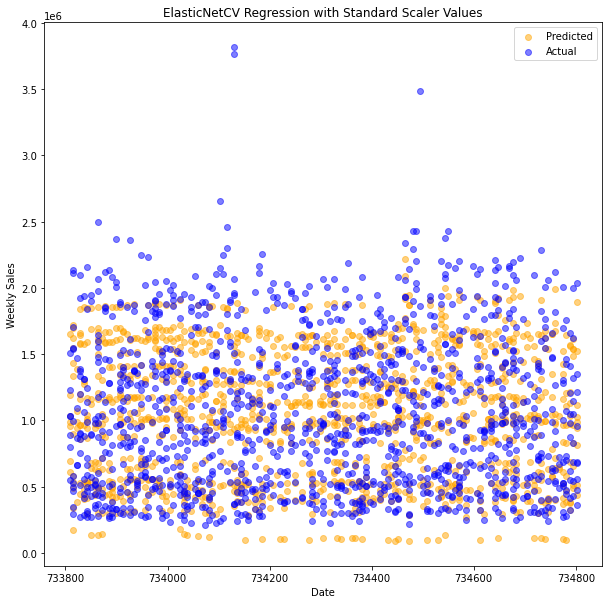

In [46]:
#Scatter plot of ElasticNetCV regression with standard scaler values
plt.figure(figsize=(10,10))
plt.title('ElasticNetCV Regression with Standard Scaler Values')
pred = plt.scatter(X_test['Date'], yESS_pred, color ="orange", alpha=0.5)
act = plt.scatter(X_test['Date'], y_test, color='blue', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend((pred, act),
           ('Predicted', 'Actual'),
           scatterpoints=1,
           loc='upper right')
plt.show()

The fit between actual and predicted values using the ElasticNetCV isn't as good as the random forst model. Most of the predicted values have a much tighter spread and lower value than the actual values.

## Predictions<a id='Predictions'></a>

Using the random forest regressor model that predicted the test data most accurately, I will preduct future sales using the retail data without sales information. I discovered this remaining data after looking over the datasets again and during the combination of weekly sales data per store.

In [47]:
y_future = regressor.predict(retail_data_nosales)

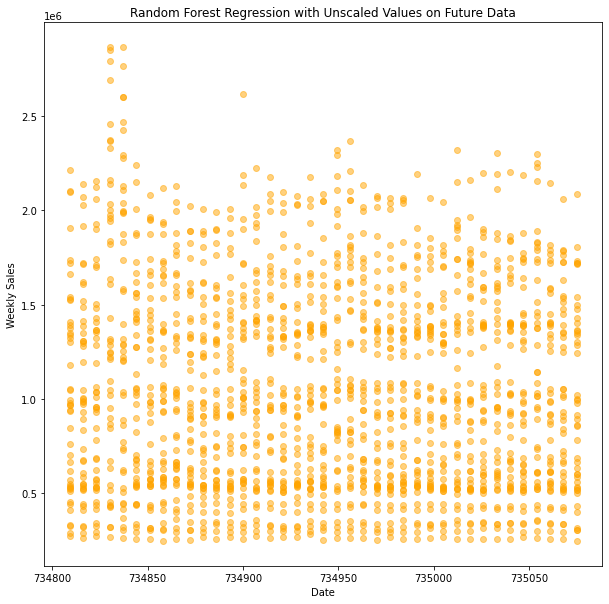

In [48]:
#Scatter plot of Random Forest Regression with Unscaled Values from future dataset
plt.figure(figsize=(10,10))
plt.title('Random Forest Regression with Unscaled Values on Future Data')
pred = plt.scatter(retail_data_nosales['Date'], y_future, color ="orange", alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

In [50]:
retail_data_pred_sales = retail_data_nosales

In [51]:
retail_data_pred_sales['Weekly_Sales'] = y_future.tolist()

In [52]:
retail_data_pred_sales

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Type_B,Type_C,Weekly_Sales
0,1,734809,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,151315,0,0,1.523026e+06
1,1,734816,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,0,151315,0,0,1.609237e+06
2,1,734823,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,0,151315,0,0,1.699708e+06
3,1,734830,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,1,151315,0,0,1.940807e+06
4,1,734837,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,0,151315,0,0,1.874971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,45,735047,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,190.676143,8.335,0,118221,1,0,7.789962e+05
1751,45,735054,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,190.462385,8.335,0,118221,1,0,1.014980e+06
1752,45,735061,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,190.237661,8.335,0,118221,1,0,7.833237e+05
1753,45,735068,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,190.001749,8.335,0,118221,1,0,8.167206e+05


In [53]:
retail_data_pred_sales['Date'] = retail_data_pred_sales['Date'].map(dt.datetime.fromordinal)

In [54]:
retail_data_pred_sales

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Type_B,Type_C,Weekly_Sales
0,1,2012-11-02,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,151315,0,0,1.523026e+06
1,1,2012-11-09,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,0,151315,0,0,1.609237e+06
2,1,2012-11-16,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,0,151315,0,0,1.699708e+06
3,1,2012-11-23,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,1,151315,0,0,1.940807e+06
4,1,2012-11-30,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,0,151315,0,0,1.874971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,190.676143,8.335,0,118221,1,0,7.789962e+05
1751,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,190.462385,8.335,0,118221,1,0,1.014980e+06
1752,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,190.237661,8.335,0,118221,1,0,7.833237e+05
1753,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,190.001749,8.335,0,118221,1,0,8.167206e+05


In [55]:
retail_data_new_dates = retail_data
retail_data_new_dates['Date'] = retail_data_new_dates['Date'].map(dt.datetime.fromordinal)
retail_list_actual_dates = retail_data_new_dates['Date'].tolist()
retail_list_future_dates = retail_data_pred_sales['Date'].tolist()
retail_list_actual_sales = retail_data_new_dates['Weekly_Sales'].tolist()
retail_list_future_sales = y_future.tolist()

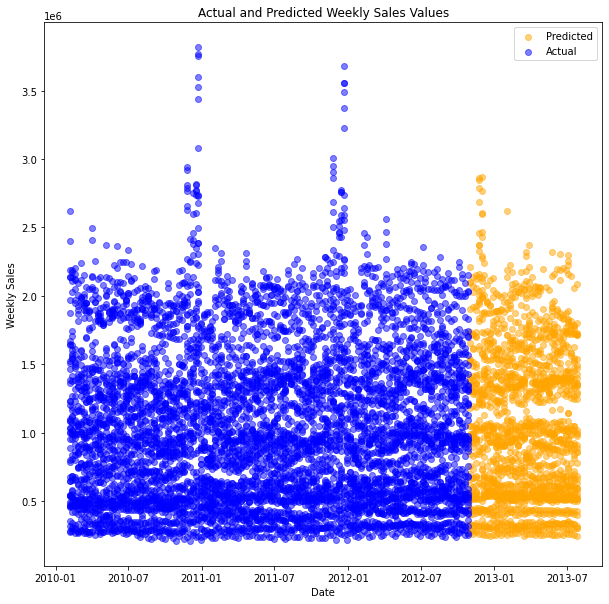

In [70]:
#Scatter plot of actual data with future predicted results
plt.figure(figsize=(10,10))
plt.title('Actual and Predicted Weekly Sales Values')
pred = plt.scatter(retail_list_future_dates, retail_list_future_sales, color ="orange", alpha=0.5)
act = plt.scatter(retail_list_actual_dates, retail_list_actual_sales, color='blue', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend((pred, act),
           ('Predicted', 'Actual'),
           scatterpoints=1,
           loc='upper right')
plt.show()

In [71]:
retail_data_store1 = retail_data.loc[retail_data['Store'] == 1]

In [73]:
retail_data_store1_pred = retail_data_pred_sales.loc[retail_data_pred_sales['Store'] == 1]

In [74]:
store1_actual_dates = retail_data_store1['Date'].tolist()
store1_future_dates = retail_data_store1_pred['Date'].tolist()
store1_actual_sales = retail_data_store1['Weekly_Sales'].tolist()
store1_future_sales = retail_data_store1_pred['Weekly_Sales'].tolist()

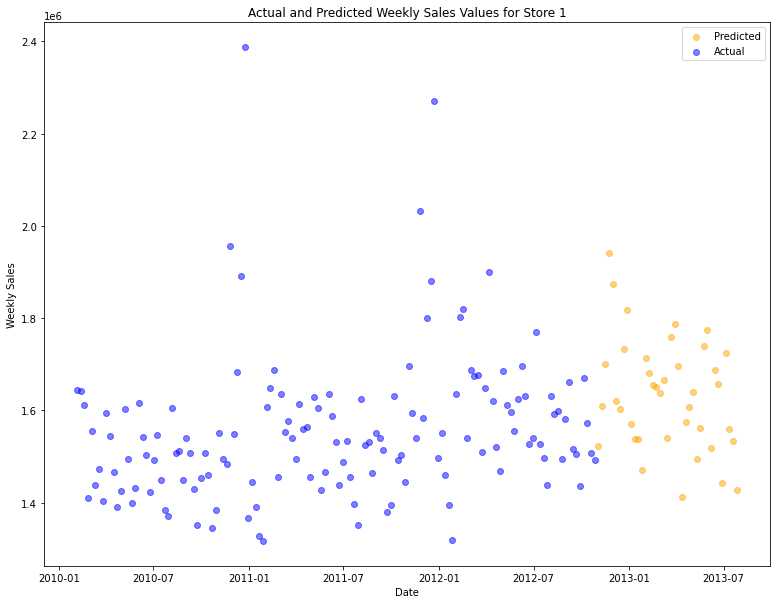

In [76]:
#Scatter plot of actual data with future predicted results for store 1
plt.figure(figsize=(13,10))
plt.title('Actual and Predicted Weekly Sales Values for Store 1')
pred = plt.scatter(store1_future_dates, store1_future_sales, color ="orange", alpha=0.5)
act = plt.scatter(store1_actual_dates, store1_actual_sales, color='blue', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend((pred, act),
           ('Predicted', 'Actual'),
           scatterpoints=1,
           loc='upper right')
plt.show()

## Summary<a id='Summary'></a>

In summary, combining the weekly sales for each department per store and date provided the best regression analysis results. Looking back over the different regression models used in this analysis, the random forest regressor using the unscaled feature values provided the best fit model overall. Both the spread and sales amounts of the predicted values were very close to the actual target values themselves. Using the features dataset for future values, I was able to use the model and predict new weekly sales amounts for those features. As shown above, both the lists of data for all stores and for just store 1 fit the actual data value trends and amounts very well.